## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 54.7ms	remaining: 54.6s
1:	learn: 0.9301086	total: 74.7ms	remaining: 37.3s
2:	learn: 0.9005637	total: 78.1ms	remaining: 25.9s
3:	learn: 0.8720983	total: 81.3ms	remaining: 20.2s
4:	learn: 0.8467410	total: 84.6ms	remaining: 16.8s
5:	learn: 0.8226672	total: 87.7ms	remaining: 14.5s
6:	learn: 0.7994702	total: 90.6ms	remaining: 12.9s
7:	learn: 0.7784272	total: 93.6ms	remaining: 11.6s
8:	learn: 0.7602192	total: 96.7ms	remaining: 10.6s
9:	learn: 0.7412421	total: 99.5ms	remaining: 9.85s
10:	learn: 0.7247930	total: 102ms	remaining: 9.21s
11:	learn: 0.7089951	total: 105ms	remaining: 8.67s
12:	learn: 0.6951345	total: 108ms	remaining: 8.21s
13:	learn: 0.6809276	total: 111ms	remaining: 7.81s
14:	learn: 0.6692630	total: 114ms	remaining: 7.49s
15:	learn: 0.6588323	total: 117ms	remaining: 7.19s
16:	learn: 0.6472700	total: 120ms	remaining: 6.95s
17:	learn: 0.6379982	total: 123ms	remaining: 6.72s
18:	learn: 0.6294674	total: 126ms	remaining: 6.52s
1

39:	learn: 0.5217941	total: 190ms	remaining: 4.56s
40:	learn: 0.5196440	total: 193ms	remaining: 4.52s
41:	learn: 0.5170220	total: 196ms	remaining: 4.47s
42:	learn: 0.5141148	total: 199ms	remaining: 4.43s
43:	learn: 0.5116444	total: 202ms	remaining: 4.38s
44:	learn: 0.5100547	total: 204ms	remaining: 4.34s
45:	learn: 0.5069096	total: 207ms	remaining: 4.29s
46:	learn: 0.5051685	total: 210ms	remaining: 4.25s
47:	learn: 0.5033968	total: 213ms	remaining: 4.22s
48:	learn: 0.5012433	total: 216ms	remaining: 4.19s
49:	learn: 0.4986132	total: 223ms	remaining: 4.24s
50:	learn: 0.4968022	total: 226ms	remaining: 4.21s
51:	learn: 0.4951632	total: 229ms	remaining: 4.17s
52:	learn: 0.4928924	total: 232ms	remaining: 4.14s
53:	learn: 0.4917272	total: 235ms	remaining: 4.11s
54:	learn: 0.4895079	total: 238ms	remaining: 4.08s
55:	learn: 0.4881884	total: 240ms	remaining: 4.05s
56:	learn: 0.4861566	total: 243ms	remaining: 4.02s
57:	learn: 0.4850201	total: 246ms	remaining: 3.99s
58:	learn: 0.4840055	total: 249

106:	learn: 0.4451085	total: 382ms	remaining: 3.19s
107:	learn: 0.4447909	total: 385ms	remaining: 3.18s
108:	learn: 0.4440936	total: 387ms	remaining: 3.17s
109:	learn: 0.4435519	total: 390ms	remaining: 3.16s
110:	learn: 0.4431075	total: 393ms	remaining: 3.15s
111:	learn: 0.4425498	total: 396ms	remaining: 3.14s
112:	learn: 0.4419106	total: 398ms	remaining: 3.13s
113:	learn: 0.4414425	total: 401ms	remaining: 3.12s
114:	learn: 0.4407446	total: 404ms	remaining: 3.11s
115:	learn: 0.4402011	total: 406ms	remaining: 3.1s
116:	learn: 0.4398559	total: 409ms	remaining: 3.09s
117:	learn: 0.4392990	total: 412ms	remaining: 3.08s
118:	learn: 0.4389153	total: 415ms	remaining: 3.07s
119:	learn: 0.4383331	total: 418ms	remaining: 3.06s
120:	learn: 0.4378136	total: 420ms	remaining: 3.05s
121:	learn: 0.4375553	total: 423ms	remaining: 3.04s
122:	learn: 0.4369995	total: 434ms	remaining: 3.1s
123:	learn: 0.4366325	total: 445ms	remaining: 3.15s
124:	learn: 0.4362823	total: 448ms	remaining: 3.14s
125:	learn: 0.

161:	learn: 0.4197073	total: 569ms	remaining: 2.94s
162:	learn: 0.4192052	total: 572ms	remaining: 2.94s
163:	learn: 0.4187949	total: 575ms	remaining: 2.93s
164:	learn: 0.4184572	total: 578ms	remaining: 2.92s
165:	learn: 0.4180680	total: 581ms	remaining: 2.92s
166:	learn: 0.4176884	total: 584ms	remaining: 2.91s
167:	learn: 0.4173026	total: 586ms	remaining: 2.9s
168:	learn: 0.4170486	total: 589ms	remaining: 2.9s
169:	learn: 0.4165960	total: 592ms	remaining: 2.89s
170:	learn: 0.4161870	total: 595ms	remaining: 2.88s
171:	learn: 0.4156228	total: 598ms	remaining: 2.88s
172:	learn: 0.4153041	total: 601ms	remaining: 2.87s
173:	learn: 0.4148857	total: 604ms	remaining: 2.87s
174:	learn: 0.4144190	total: 607ms	remaining: 2.86s
175:	learn: 0.4140875	total: 610ms	remaining: 2.85s
176:	learn: 0.4136755	total: 613ms	remaining: 2.85s
177:	learn: 0.4133860	total: 615ms	remaining: 2.84s
178:	learn: 0.4129780	total: 618ms	remaining: 2.83s
179:	learn: 0.4122907	total: 621ms	remaining: 2.83s
180:	learn: 0.

221:	learn: 0.3981001	total: 759ms	remaining: 2.66s
222:	learn: 0.3978579	total: 763ms	remaining: 2.66s
223:	learn: 0.3976462	total: 766ms	remaining: 2.65s
224:	learn: 0.3973704	total: 769ms	remaining: 2.65s
225:	learn: 0.3971729	total: 772ms	remaining: 2.64s
226:	learn: 0.3968841	total: 775ms	remaining: 2.64s
227:	learn: 0.3965787	total: 778ms	remaining: 2.63s
228:	learn: 0.3963073	total: 780ms	remaining: 2.63s
229:	learn: 0.3960925	total: 784ms	remaining: 2.62s
230:	learn: 0.3957018	total: 787ms	remaining: 2.62s
231:	learn: 0.3954162	total: 790ms	remaining: 2.61s
232:	learn: 0.3951665	total: 793ms	remaining: 2.61s
233:	learn: 0.3949269	total: 796ms	remaining: 2.6s
234:	learn: 0.3945894	total: 799ms	remaining: 2.6s
235:	learn: 0.3944181	total: 803ms	remaining: 2.6s
236:	learn: 0.3941497	total: 806ms	remaining: 2.6s
237:	learn: 0.3939819	total: 809ms	remaining: 2.59s
238:	learn: 0.3938322	total: 812ms	remaining: 2.58s
239:	learn: 0.3935463	total: 815ms	remaining: 2.58s
240:	learn: 0.39

284:	learn: 0.3830010	total: 951ms	remaining: 2.38s
285:	learn: 0.3826742	total: 954ms	remaining: 2.38s
286:	learn: 0.3824534	total: 957ms	remaining: 2.38s
287:	learn: 0.3821767	total: 959ms	remaining: 2.37s
288:	learn: 0.3819748	total: 962ms	remaining: 2.37s
289:	learn: 0.3817667	total: 965ms	remaining: 2.36s
290:	learn: 0.3815253	total: 968ms	remaining: 2.36s
291:	learn: 0.3813529	total: 971ms	remaining: 2.35s
292:	learn: 0.3812172	total: 973ms	remaining: 2.35s
293:	learn: 0.3809978	total: 976ms	remaining: 2.34s
294:	learn: 0.3807825	total: 979ms	remaining: 2.34s
295:	learn: 0.3805940	total: 982ms	remaining: 2.33s
296:	learn: 0.3801959	total: 985ms	remaining: 2.33s
297:	learn: 0.3799439	total: 987ms	remaining: 2.33s
298:	learn: 0.3797228	total: 990ms	remaining: 2.32s
299:	learn: 0.3795554	total: 993ms	remaining: 2.32s
300:	learn: 0.3793733	total: 996ms	remaining: 2.31s
301:	learn: 0.3791607	total: 998ms	remaining: 2.31s
302:	learn: 0.3789297	total: 1s	remaining: 2.3s
303:	learn: 0.37

349:	learn: 0.3701923	total: 1.14s	remaining: 2.12s
350:	learn: 0.3700067	total: 1.14s	remaining: 2.12s
351:	learn: 0.3698930	total: 1.15s	remaining: 2.12s
352:	learn: 0.3697314	total: 1.15s	remaining: 2.12s
353:	learn: 0.3695617	total: 1.16s	remaining: 2.11s
354:	learn: 0.3694397	total: 1.16s	remaining: 2.11s
355:	learn: 0.3692589	total: 1.16s	remaining: 2.1s
356:	learn: 0.3691107	total: 1.17s	remaining: 2.1s
357:	learn: 0.3689645	total: 1.17s	remaining: 2.1s
358:	learn: 0.3687886	total: 1.17s	remaining: 2.09s
359:	learn: 0.3686485	total: 1.18s	remaining: 2.09s
360:	learn: 0.3685749	total: 1.18s	remaining: 2.08s
361:	learn: 0.3683909	total: 1.18s	remaining: 2.08s
362:	learn: 0.3682710	total: 1.18s	remaining: 2.08s
363:	learn: 0.3681254	total: 1.19s	remaining: 2.07s
364:	learn: 0.3679761	total: 1.19s	remaining: 2.07s
365:	learn: 0.3677932	total: 1.19s	remaining: 2.07s
366:	learn: 0.3676022	total: 1.2s	remaining: 2.06s
367:	learn: 0.3674148	total: 1.2s	remaining: 2.06s
368:	learn: 0.367

410:	learn: 0.3604920	total: 1.33s	remaining: 1.91s
411:	learn: 0.3603038	total: 1.33s	remaining: 1.91s
412:	learn: 0.3602055	total: 1.34s	remaining: 1.9s
413:	learn: 0.3599094	total: 1.34s	remaining: 1.9s
414:	learn: 0.3597887	total: 1.34s	remaining: 1.9s
415:	learn: 0.3595791	total: 1.35s	remaining: 1.89s
416:	learn: 0.3594487	total: 1.35s	remaining: 1.89s
417:	learn: 0.3592759	total: 1.35s	remaining: 1.88s
418:	learn: 0.3591088	total: 1.36s	remaining: 1.88s
419:	learn: 0.3589470	total: 1.36s	remaining: 1.88s
420:	learn: 0.3587972	total: 1.36s	remaining: 1.87s
421:	learn: 0.3586831	total: 1.36s	remaining: 1.87s
422:	learn: 0.3585620	total: 1.37s	remaining: 1.86s
423:	learn: 0.3584427	total: 1.37s	remaining: 1.86s
424:	learn: 0.3583044	total: 1.37s	remaining: 1.86s
425:	learn: 0.3581698	total: 1.38s	remaining: 1.85s
426:	learn: 0.3580461	total: 1.38s	remaining: 1.85s
427:	learn: 0.3579182	total: 1.38s	remaining: 1.84s
428:	learn: 0.3577521	total: 1.38s	remaining: 1.84s
429:	learn: 0.3

475:	learn: 0.3512406	total: 1.52s	remaining: 1.68s
476:	learn: 0.3510044	total: 1.53s	remaining: 1.68s
477:	learn: 0.3509121	total: 1.53s	remaining: 1.67s
478:	learn: 0.3507270	total: 1.53s	remaining: 1.67s
479:	learn: 0.3506003	total: 1.54s	remaining: 1.66s
480:	learn: 0.3505111	total: 1.54s	remaining: 1.66s
481:	learn: 0.3503906	total: 1.54s	remaining: 1.66s
482:	learn: 0.3501522	total: 1.54s	remaining: 1.65s
483:	learn: 0.3500494	total: 1.55s	remaining: 1.65s
484:	learn: 0.3498921	total: 1.55s	remaining: 1.65s
485:	learn: 0.3497143	total: 1.55s	remaining: 1.64s
486:	learn: 0.3496172	total: 1.55s	remaining: 1.64s
487:	learn: 0.3494609	total: 1.56s	remaining: 1.63s
488:	learn: 0.3493200	total: 1.56s	remaining: 1.63s
489:	learn: 0.3491550	total: 1.56s	remaining: 1.63s
490:	learn: 0.3490323	total: 1.57s	remaining: 1.63s
491:	learn: 0.3488767	total: 1.57s	remaining: 1.62s
492:	learn: 0.3487285	total: 1.57s	remaining: 1.62s
493:	learn: 0.3486318	total: 1.58s	remaining: 1.61s
494:	learn: 

543:	learn: 0.3423997	total: 1.72s	remaining: 1.44s
544:	learn: 0.3422315	total: 1.72s	remaining: 1.44s
545:	learn: 0.3421242	total: 1.72s	remaining: 1.43s
546:	learn: 0.3419673	total: 1.73s	remaining: 1.43s
547:	learn: 0.3418121	total: 1.73s	remaining: 1.43s
548:	learn: 0.3416228	total: 1.73s	remaining: 1.42s
549:	learn: 0.3414331	total: 1.73s	remaining: 1.42s
550:	learn: 0.3413090	total: 1.74s	remaining: 1.41s
551:	learn: 0.3411591	total: 1.74s	remaining: 1.41s
552:	learn: 0.3410901	total: 1.74s	remaining: 1.41s
553:	learn: 0.3409923	total: 1.74s	remaining: 1.4s
554:	learn: 0.3408730	total: 1.75s	remaining: 1.4s
555:	learn: 0.3408310	total: 1.75s	remaining: 1.4s
556:	learn: 0.3407365	total: 1.75s	remaining: 1.39s
557:	learn: 0.3406506	total: 1.75s	remaining: 1.39s
558:	learn: 0.3405352	total: 1.76s	remaining: 1.39s
559:	learn: 0.3404352	total: 1.76s	remaining: 1.38s
560:	learn: 0.3403419	total: 1.76s	remaining: 1.38s
561:	learn: 0.3402836	total: 1.77s	remaining: 1.38s
562:	learn: 0.3

609:	learn: 0.3353398	total: 1.91s	remaining: 1.22s
610:	learn: 0.3352669	total: 1.91s	remaining: 1.22s
611:	learn: 0.3351716	total: 1.92s	remaining: 1.22s
612:	learn: 0.3351155	total: 1.92s	remaining: 1.21s
613:	learn: 0.3350041	total: 1.92s	remaining: 1.21s
614:	learn: 0.3349098	total: 1.93s	remaining: 1.21s
615:	learn: 0.3348304	total: 1.93s	remaining: 1.2s
616:	learn: 0.3347009	total: 1.93s	remaining: 1.2s
617:	learn: 0.3346458	total: 1.94s	remaining: 1.2s
618:	learn: 0.3345381	total: 1.94s	remaining: 1.19s
619:	learn: 0.3344101	total: 1.94s	remaining: 1.19s
620:	learn: 0.3343267	total: 1.94s	remaining: 1.19s
621:	learn: 0.3342275	total: 1.95s	remaining: 1.18s
622:	learn: 0.3341456	total: 1.95s	remaining: 1.18s
623:	learn: 0.3340640	total: 1.95s	remaining: 1.18s
624:	learn: 0.3339122	total: 1.96s	remaining: 1.17s
625:	learn: 0.3337503	total: 1.96s	remaining: 1.17s
626:	learn: 0.3336593	total: 1.96s	remaining: 1.17s
627:	learn: 0.3335713	total: 1.97s	remaining: 1.16s
628:	learn: 0.3

675:	learn: 0.3286108	total: 2.1s	remaining: 1.01s
676:	learn: 0.3285218	total: 2.1s	remaining: 1s
677:	learn: 0.3284620	total: 2.11s	remaining: 1s
678:	learn: 0.3283999	total: 2.11s	remaining: 998ms
679:	learn: 0.3283506	total: 2.11s	remaining: 995ms
680:	learn: 0.3282208	total: 2.12s	remaining: 991ms
681:	learn: 0.3281020	total: 2.12s	remaining: 988ms
682:	learn: 0.3280328	total: 2.12s	remaining: 986ms
683:	learn: 0.3279574	total: 2.13s	remaining: 982ms
684:	learn: 0.3278928	total: 2.13s	remaining: 979ms
685:	learn: 0.3278094	total: 2.13s	remaining: 976ms
686:	learn: 0.3277178	total: 2.13s	remaining: 972ms
687:	learn: 0.3276684	total: 2.14s	remaining: 969ms
688:	learn: 0.3275537	total: 2.14s	remaining: 966ms
689:	learn: 0.3274808	total: 2.14s	remaining: 962ms
690:	learn: 0.3273839	total: 2.15s	remaining: 959ms
691:	learn: 0.3272773	total: 2.15s	remaining: 956ms
692:	learn: 0.3272088	total: 2.15s	remaining: 953ms
693:	learn: 0.3271216	total: 2.15s	remaining: 950ms
694:	learn: 0.327056

711:	learn: 0.3254442	total: 2.22s	remaining: 897ms
712:	learn: 0.3253361	total: 2.22s	remaining: 894ms
713:	learn: 0.3252431	total: 2.22s	remaining: 891ms
714:	learn: 0.3251186	total: 2.23s	remaining: 888ms
715:	learn: 0.3250323	total: 2.23s	remaining: 885ms
716:	learn: 0.3249511	total: 2.23s	remaining: 881ms
717:	learn: 0.3248372	total: 2.24s	remaining: 878ms
718:	learn: 0.3247371	total: 2.24s	remaining: 875ms
719:	learn: 0.3246676	total: 2.24s	remaining: 872ms
720:	learn: 0.3245862	total: 2.24s	remaining: 869ms
721:	learn: 0.3245270	total: 2.25s	remaining: 865ms
722:	learn: 0.3244558	total: 2.25s	remaining: 862ms
723:	learn: 0.3243835	total: 2.25s	remaining: 859ms
724:	learn: 0.3242957	total: 2.25s	remaining: 855ms
725:	learn: 0.3242628	total: 2.26s	remaining: 852ms
726:	learn: 0.3242076	total: 2.26s	remaining: 849ms
727:	learn: 0.3240923	total: 2.26s	remaining: 846ms
728:	learn: 0.3240148	total: 2.27s	remaining: 842ms
729:	learn: 0.3239014	total: 2.27s	remaining: 839ms
730:	learn: 

778:	learn: 0.3194714	total: 2.41s	remaining: 683ms
779:	learn: 0.3194042	total: 2.41s	remaining: 680ms
780:	learn: 0.3193209	total: 2.41s	remaining: 677ms
781:	learn: 0.3192009	total: 2.42s	remaining: 674ms
782:	learn: 0.3191109	total: 2.42s	remaining: 670ms
783:	learn: 0.3190255	total: 2.42s	remaining: 667ms
784:	learn: 0.3189403	total: 2.42s	remaining: 664ms
785:	learn: 0.3188715	total: 2.43s	remaining: 661ms
786:	learn: 0.3188016	total: 2.43s	remaining: 658ms
787:	learn: 0.3187670	total: 2.44s	remaining: 655ms
788:	learn: 0.3186601	total: 2.44s	remaining: 652ms
789:	learn: 0.3185886	total: 2.44s	remaining: 649ms
790:	learn: 0.3185418	total: 2.44s	remaining: 646ms
791:	learn: 0.3184514	total: 2.45s	remaining: 643ms
792:	learn: 0.3183529	total: 2.45s	remaining: 640ms
793:	learn: 0.3182569	total: 2.45s	remaining: 636ms
794:	learn: 0.3181932	total: 2.46s	remaining: 633ms
795:	learn: 0.3180848	total: 2.46s	remaining: 630ms
796:	learn: 0.3180327	total: 2.46s	remaining: 627ms
797:	learn: 

841:	learn: 0.3143434	total: 2.6s	remaining: 488ms
842:	learn: 0.3142662	total: 2.6s	remaining: 485ms
843:	learn: 0.3141532	total: 2.6s	remaining: 482ms
844:	learn: 0.3140919	total: 2.61s	remaining: 478ms
845:	learn: 0.3140384	total: 2.61s	remaining: 475ms
846:	learn: 0.3139822	total: 2.61s	remaining: 472ms
847:	learn: 0.3138839	total: 2.62s	remaining: 469ms
848:	learn: 0.3138291	total: 2.62s	remaining: 466ms
849:	learn: 0.3137772	total: 2.62s	remaining: 463ms
850:	learn: 0.3137138	total: 2.63s	remaining: 460ms
851:	learn: 0.3136859	total: 2.63s	remaining: 457ms
852:	learn: 0.3136054	total: 2.63s	remaining: 454ms
853:	learn: 0.3135239	total: 2.64s	remaining: 451ms
854:	learn: 0.3134711	total: 2.64s	remaining: 448ms
855:	learn: 0.3134242	total: 2.64s	remaining: 445ms
856:	learn: 0.3133249	total: 2.65s	remaining: 441ms
857:	learn: 0.3132311	total: 2.65s	remaining: 438ms
858:	learn: 0.3131446	total: 2.66s	remaining: 436ms
859:	learn: 0.3130587	total: 2.66s	remaining: 433ms
860:	learn: 0.3

902:	learn: 0.3098989	total: 2.79s	remaining: 300ms
903:	learn: 0.3098084	total: 2.79s	remaining: 297ms
904:	learn: 0.3097402	total: 2.79s	remaining: 293ms
905:	learn: 0.3096378	total: 2.8s	remaining: 290ms
906:	learn: 0.3095878	total: 2.8s	remaining: 287ms
907:	learn: 0.3095154	total: 2.8s	remaining: 284ms
908:	learn: 0.3094688	total: 2.81s	remaining: 281ms
909:	learn: 0.3093784	total: 2.81s	remaining: 278ms
910:	learn: 0.3093058	total: 2.81s	remaining: 275ms
911:	learn: 0.3092574	total: 2.81s	remaining: 272ms
912:	learn: 0.3092023	total: 2.82s	remaining: 269ms
913:	learn: 0.3091306	total: 2.82s	remaining: 265ms
914:	learn: 0.3090719	total: 2.82s	remaining: 262ms
915:	learn: 0.3090199	total: 2.83s	remaining: 259ms
916:	learn: 0.3089417	total: 2.83s	remaining: 256ms
917:	learn: 0.3088562	total: 2.83s	remaining: 253ms
918:	learn: 0.3087578	total: 2.83s	remaining: 250ms
919:	learn: 0.3086793	total: 2.84s	remaining: 247ms
920:	learn: 0.3086255	total: 2.84s	remaining: 244ms
921:	learn: 0.3

971:	learn: 0.3047712	total: 2.98s	remaining: 85.9ms
972:	learn: 0.3047313	total: 2.98s	remaining: 82.8ms
973:	learn: 0.3046600	total: 2.99s	remaining: 79.8ms
974:	learn: 0.3045983	total: 2.99s	remaining: 76.7ms
975:	learn: 0.3044944	total: 2.99s	remaining: 73.6ms
976:	learn: 0.3044431	total: 3s	remaining: 70.6ms
977:	learn: 0.3043959	total: 3s	remaining: 67.5ms
978:	learn: 0.3043249	total: 3s	remaining: 64.4ms
979:	learn: 0.3042644	total: 3.01s	remaining: 61.4ms
980:	learn: 0.3042142	total: 3.01s	remaining: 58.3ms
981:	learn: 0.3041509	total: 3.01s	remaining: 55.2ms
982:	learn: 0.3041077	total: 3.02s	remaining: 52.1ms
983:	learn: 0.3040665	total: 3.02s	remaining: 49.1ms
984:	learn: 0.3040237	total: 3.02s	remaining: 46ms
985:	learn: 0.3039532	total: 3.02s	remaining: 42.9ms
986:	learn: 0.3038723	total: 3.03s	remaining: 39.9ms
987:	learn: 0.3038141	total: 3.03s	remaining: 36.8ms
988:	learn: 0.3037455	total: 3.03s	remaining: 33.7ms
989:	learn: 0.3036820	total: 3.04s	remaining: 30.7ms
990:

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
413144022.6567163


#### Sanity Checks 

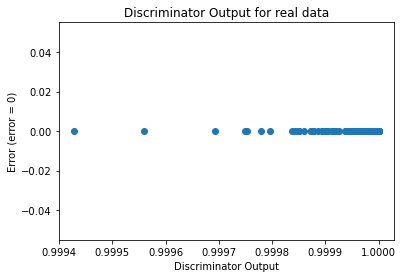

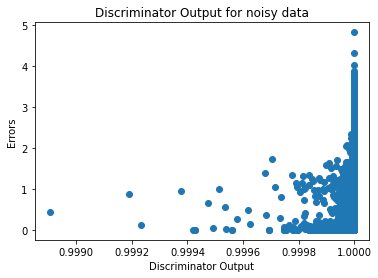

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)